<a href="https://colab.research.google.com/github/Kushagr-25/multithreading/blob/main/multithreading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os,sys,platform
import numpy as np
import pandas as pd
import time
import random as r
import matplotlib.pyplot as plt

In [2]:
print("OS type: ",os.name)
print("sys type: ",sys.platform)
print("Platform: ",platform.platform())

OS type:  posix
sys type:  linux
Platform:  Linux-6.1.58+-x86_64-with-glibc2.35


In [3]:
import multiprocessing
num_cores = multiprocessing.cpu_count()
print("Number of Cores: ",num_cores)

Number of Cores:  2


In [4]:
import threading
activeThread = threading.active_count()
print("No. of active threads: ",activeThread)

No. of active threads:  5


In [5]:
def generate_random_matrices(n, size):
    matrices = []
    for _ in range(n):
        matrices.append(np.random.rand(size, size))
    return matrices

In [6]:
def multiply_matrices(matrices, constant_matrix):
    result = constant_matrix.copy()
    for matrix in matrices:
        result = np.dot(result, matrix)
    return result

In [7]:
def perform_multiplication_with_threads(num_threads, matrices, constant_matrix):
    start_time = time.time()
    threads = []
    for i in range(0, len(matrices), num_threads):
        thread = threading.Thread(target=multiply_matrices, args=(matrices[i:i+num_threads], constant_matrix))
        threads.append(thread)
        thread.start()
    for thread in threads:
        thread.join()
    end_time = time.time()
    return end_time - start_time

In [8]:
num_matrices = 100
matrix_size = 1000
matrices=generate_random_matrices(num_matrices,matrix_size)

In [9]:
constant_matrix = np.random.rand(matrix_size, matrix_size)

In [10]:
results = {}
for num_threads in range(1, num_cores + 1):
    time_taken = perform_multiplication_with_threads(num_threads,matrices,constant_matrix)
    results[num_threads] = time_taken

In [11]:
df = pd.DataFrame.from_dict(results, orient='index', columns=['Time Taken (s)'])
df.index.name = 'Threads'
df.reset_index(inplace=True)
print(df)

   Threads  Time Taken (s)
0        1        7.934169
1        2        5.998452


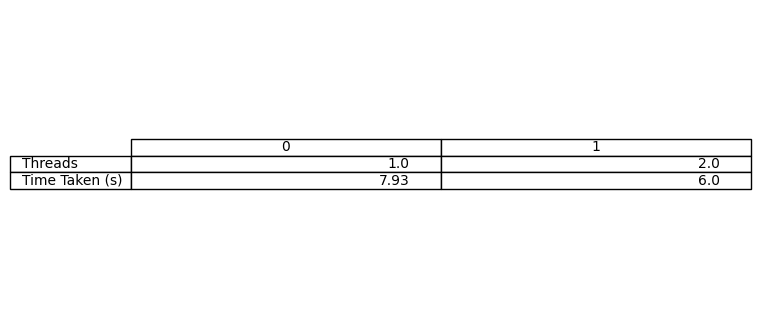

In [12]:
df2 = df.T.round(2)

fig, ax = plt.subplots(figsize=(8,4))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df2.values,colLabels=df2.columns,rowLabels=df2.index,loc='center')
plt.savefig('No_of_threads_vs_time.png')
plt.show()

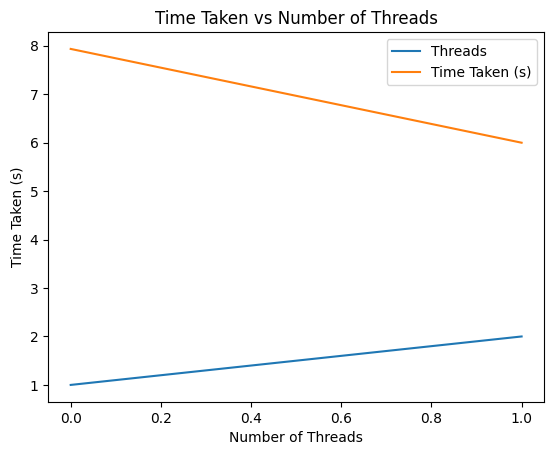

In [13]:
df.plot()
plt.xlabel('Number of Threads')
plt.ylabel('Time Taken (s)')
plt.title('Time Taken vs Number of Threads')
plt.show()